# Regression Predict | Skeleton

© Explore Data Science Academy






## Spain Electricity Supply

The total consumption of 239.50 billion kWh of electric energy per year. Per capita this is an average of 5,061 kWh. Source: [worlddata](https://www.worlddata.info/europe/spain/energy-consumption.php)


Spain could provide itself completely with self-produced energy. The total production of all electric energy producing facilities is 259 bn kWh, which is 108% of the countries own usage. Despite this, Spain is trading energy with foreign countries. Along with pure consumptions the production, imports and exports play an important role. Other energy sources such as natural gas or crude oil are also used. In spite of this, Spain finds itself short of available electricity and ergo needs to plan for shortfalls as and when they occur. 

![title](infrastructure_spain.png)




---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. We have been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


### Solution Approach

In this project we are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. We endevour to clean the data, and find an optimal respresentation from within the features, such that we can forecast 3-hourly shortfalls. We beleive this is a Regression-style problem, which will add high value to the Government of Spain. The model may be deployed on the cloud (using AWS infrastructure) and allow the Government to manage expectations of the population, and leverage and acquire resourced in advance of emmergencies due to our innovative modelling.

### What is expected from you?
- Notebook analysis: As part of the first step you are required to: explore the provided dataset, clean the data, engineer new features, and build an accurate regression model.
- Kaggle Challenge: Next you need to use your trained ML model to participate in a Kaggle competition. 
- Model Deployment (optional): In the third step you will again use your trained ML model, this time to deploy it on a Flask webserver with the help of AWS. This is a bonus step, it is not required in an individual predict, but it is great exposure to using APIs. 
- No presentation 

### Kaggle
Allows users to: discover and publish their own data sets, explore and build models in a web-based data-science environment;  work with other data scientists; and enter competitions to solve data science challenges.

#### You will need to:
- [Sign up to Kaggle](https://www.kaggle.com/) and create your own personal profile.
- Enter the [Kaggle Challenge](https://www.kaggle.com/competitions/edsa-individual-electricity-shortfall-challenge/overview). 
- Use your notebook and ML model created in your notebook. At least 1 submission is required per person.
- Ensure your notebook can produce a valid submission. Submit this output to Kaggle to be placed on the Challenge Leaderboard (you can do this multiple times).

### Da Rulez
- This project is an individual project. You are advised to collaborate in ideas, discussions, and direction. However, you are not allowed to share your code, solutions, or submissions with others. 
- Submissions on Kaggle must be done individually - part of your Predict mark will be based upon your best score on the Leaderboard. 
- You will be required to prove how you obtained a given submission result, which will be done though the notebook upload on ATHENA, which must include the full code used to get from the raw data, to the output submission on Kaggle. Failure to be able to prove how the kaggle submission was attained, will receive a mark of 0 for the predic

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section we import, and briefly discuss, the libraries that will be used throughout analysis and modelling.


In [1]:
# importing packages to for us take advantage of open-source python libraries,
# and efficiently perform mathematical, statistical calculations as well as visualise, do EDA, etc.

# general packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt
import math
import random
from scipy import stats

# packages for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Setting global constants to ensure notebook results are reproducible
# this will be used when we use algorithms that involve any level of randomness 
PARAMETER_CONSTANT = 42

In [2]:
# you may need to install this seperately if you have not used if before: missingno
import missingno as msno

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We load the data, and describe the processes used to ensure that our modelling process is robust, rigourous, and therefore good throughout our upcoming steps. We will be using two seperate files - a "test" file and a "train" file. The test file will be regarded as seperate for the entirity of this process, and all work, analysis and EDA will be based entirely on the Train data. This allows the Test file to be used as representative of totally unseen data. 

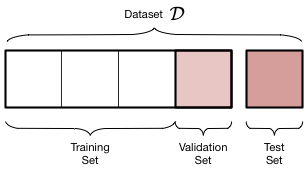

In [3]:
# load the data

df_sample = pd.read_csv('sample_submission_load_shortfall.csv')
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we $EXPLORE$ the data we have available. (Nudge nudge, wink-wink... bad EXPLORE-dad joke. Ignore me.)

In [4]:
# high level data understanding 
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- We have an extra column... the index was accidentally imported.
- The time variable looks interesting, a lot of useful information could exist here. 

- <font color='red'>Are there obvious nulls...?</font>
- <font color='red'>Are there other things this inspires us to look for? </font>
- <font color='red'>Do we understand everything here?     </font>


In [ ]:
df_train.columns

In [7]:
# look at data statistics

df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


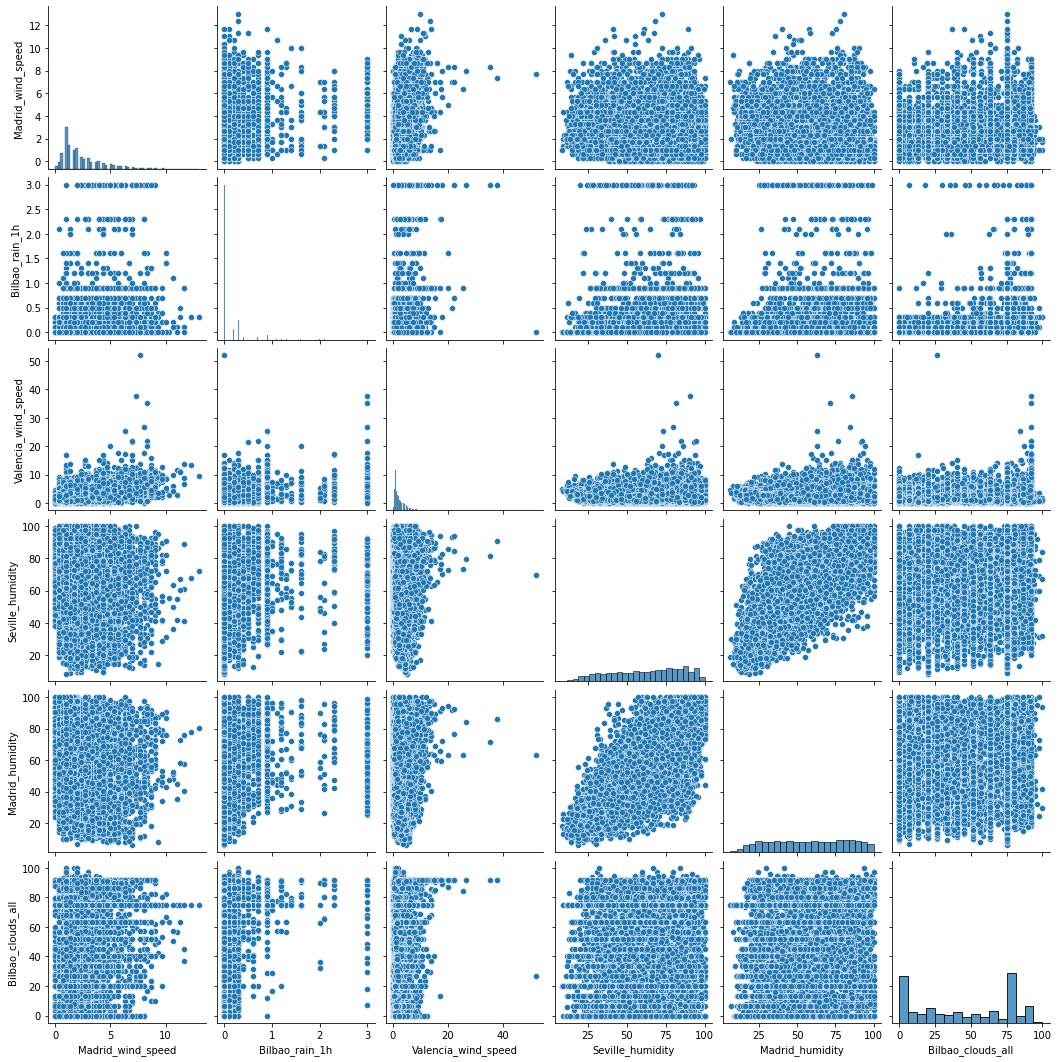

In [8]:
# plot relevant feature interactions

sns.pairplot(df_train[['Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all']])

<AxesSubplot:>

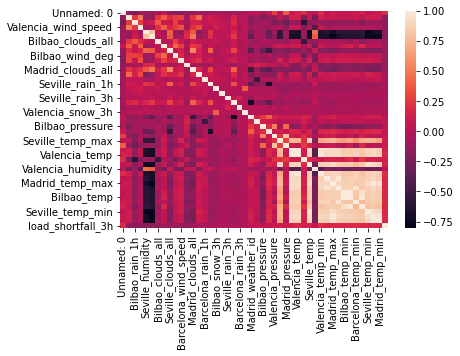

In [9]:
# evaluate correlation

sns.heatmap(df_train.corr())

<AxesSubplot:>

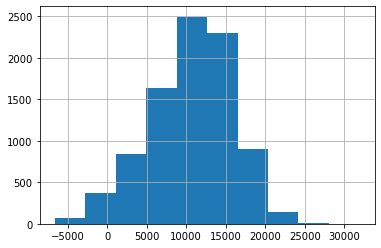

In [10]:
# have a look at feature distributions

df_train.load_shortfall_3h.hist()

<AxesSubplot:>

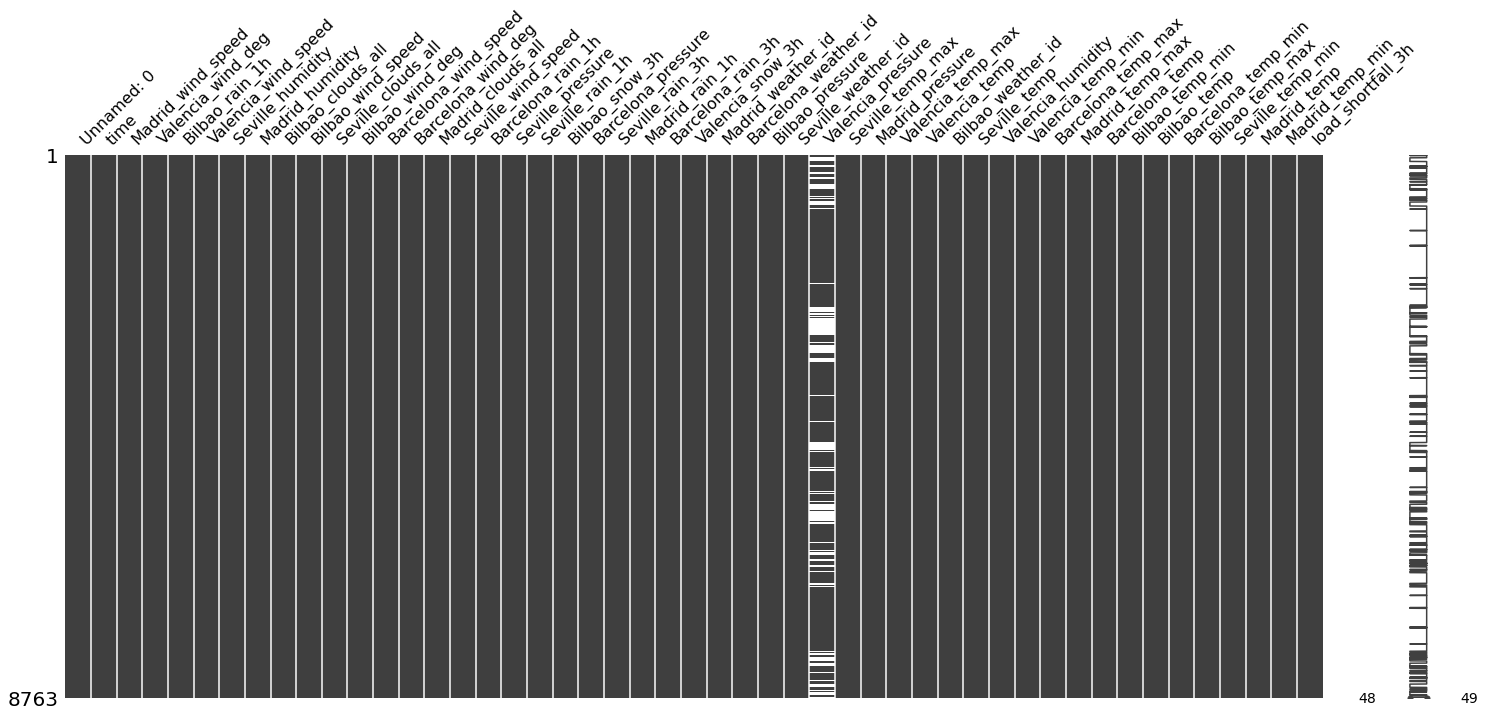

In [11]:
# investigate missing data

msno.matrix(df_train)

C:\Users\chadb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

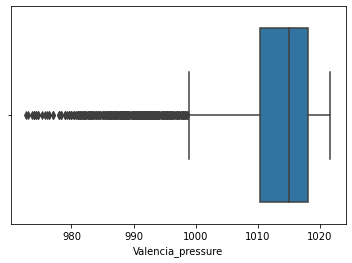

In [12]:
# we notice a large amount of missing values in the valencia pressure column

sns.boxplot(df_train['Valencia_pressure'])

In [13]:
# look at data statistics of this column

print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222828
Median
1015.0


In [14]:
# let's clean this - null-imputation to 0

df_clean = df_train

# we will be using this value to fill in the test data as well. 

vp_training_mode=df_clean['Valencia_pressure'].mode()[0]

df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### We need to alter the data... AND we need to do this in such a way that it is replicable. 

#### Ideas for changes we will potentially be making:
* Drop features which are not needed
* Transform data - possibly through typecasting, and through extracting information 
* Encode - one-hot-encoding allows mathematical models to adequately process data

In [15]:
# typecasting 

df_clean['time'] = pd.to_datetime(df_clean['time'])

# create new features

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [16]:
df_clean['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

In [18]:
# engineer features

def hr_func(ts):
    return str(ts.hour)

df_clean['time_hour'] = df_clean['time'].apply(hr_func)
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [19]:
# remove missing values/ features

df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [20]:
# get dummy variables 

df_clean=pd.get_dummies(df_clean, drop_first=True)

In [21]:
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,0,0,0,0,0,1,0,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,0,0,0,0,0,0,1,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,0,0,0,0,0,0,0,1
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,0,1,0,0,0,0,0,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,0,0,1,0,0,0,0,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Get data ready to be modelled (test-train split if required.... in this case, recall the 'validation' set concept we introduced earlier). 

- test-train split
- instantiate model
- fit onto train data
- predict on test model 
- evaluate performance


In [22]:
# create targets and features dataset

y = df_clean[['load_shortfall_3h']]
x = df_clean.drop('load_shortfall_3h',axis=1)

In [23]:
# split data

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [ ]:
DecisionTreeRegressor?

In [24]:
# create one or more ML models
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=3, min_impurity_decrease=0.02 )

In [25]:
# fit onto train data

lr_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.02, random_state=42)

In [26]:
x_train.shape

(7010, 76)

In [27]:
# predict

lr_preds = lr_model.predict(x_test)
tree_preds = tree_model.predict(x_test)

In [28]:
lr_preds

array([[12827.26062303],
       [13016.00484479],
       [ 9435.5152857 ],
       ...,
       [ 9787.90168323],
       [14310.22356076],
       [13673.38658009]])

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we look to evaluate, and compare the performance of various different models. We will use the RMSE (root mean squared error) in order to compare the performance. 

In [29]:
# define error function 

# this is actually not necesssary... we could just import this. 
# using this as an example of how to (excesssively) use a docstring

def rmse(y_test, y_predict):
    '''
    In this function we return the root mean square error.
    
            Parameters:
                    y_test (numpy.array): A 1-dimensional numpy array
                    y_predict (numpy.array): A 1-dimensional numpy array

            Returns:
                    val_ (float): the RMSE
    '''
    val_=np.sqrt(mean_squared_error(y_test, y_predict))
    
    return val_

In [30]:
# evaluate model performance 

rmse(y_test, lr_preds)

4490.487359958228

In [31]:
# Compare model performance... if multiple models

rmse(y_test, tree_preds)

4906.349843836393

- <font color='red'>How is the model performing?   </font>
- <font color='red'>What is the baseline we are comparing to.... i.e. what is a 'good' performance?   </font>
- <font color='red'>Choose best model and motivate why it is the best choice    </font>


### Make submission to kaggle!

- Repeat the preprocessing and cleaning process from Train data
- Take saved model - and make predictions onto the Test file 
- Export as CSV... in the 'sample_submission' format

In [ ]:
df_test.head()

In [32]:
output = pd.DataFrame({"time":df_test['time']})

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(vp_training_mode)
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['time_hour'] = df_test['time'].apply(hr_func)
df_test = df_test.drop(['Unnamed: 0' , 'time'], axis = 1)

In [33]:
df_test=pd.get_dummies(df_test, drop_first=True)
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,0,0,0,0,0,0,0,0,0,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,0,0,0,0,0,0,0,1,0,0
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,0,0,0,0,0,0,0,0,1,0
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,0,0,0,0,0,0,0,0,0,1
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,0,0,0,1,0,0,0,0,0,0


In [34]:
test_pred=lr_model.predict(df_test)

In [35]:
test_pred

array([[10827.21397526],
       [ 6139.58603929],
       [ 5364.40123697],
       ...,
       [12704.98024277],
       [12454.35559654],
       [13155.24925449]])

In [36]:
df_sample.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,0
1,2018-01-01 03:00:00,1
2,2018-01-01 06:00:00,2
3,2018-01-01 09:00:00,3
4,2018-01-01 12:00:00,4


In [37]:
output['load_shortfall_3h']=test_pred   
output.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10827.213975
1,2018-01-01 03:00:00,6139.586039
2,2018-01-01 06:00:00,5364.401237
3,2018-01-01 09:00:00,9176.529837
4,2018-01-01 12:00:00,10639.772903


In [ ]:
output.to_csv?

In [38]:
output.to_csv("submission_skeleton.csv",index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Discuss how the best performing model works in a for all stakeholder. Both technical and non-technical stakeholders need to be able to grasp the intuition behind the model's inner workings. 


In [ ]:
# discuss chosen methods logic



- <font color='red'>Conclusion?  </font>
- <font color='red'>Limitations?   </font>
- <font color='red'>Next steps?   </font>
- <font color='red'>Tie-back to problem statement...?  </font>
- <font color='red'>... </font>


## How to improve

* Better Model
* Better Features
* Hyper Parameter Tunning 
* Cross Validation